# Ex00 Binary classifier

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

Классификация - таргет-переменная категориальная

## 1. Preprocessing

In [6]:
data = pd.read_csv('../data/checker_timestamp.csv')
data = data.reset_index()
data['timestamp'] = pd.to_datetime(data.timestamp)
data.head()

,index,timestamp
0,0,2020-04-17 05:19:02.744528
1,1,2020-04-17 05:22:35.249331
2,2,2020-04-17 05:22:45.549397
3,3,2020-04-17 05:34:14.691200
4,4,2020-04-17 05:34:24.422370


In [7]:
data['date'] = data.timestamp.dt.date
data['hour'] = data.timestamp.dt.hour

In [8]:
data['is_pm'] = data.hour >= 12

In [9]:
data['is_am'] = ~data['is_pm']

In [10]:
data

,index,timestamp,date,hour,is_pm,is_am
0,0,2020-04-17 05:19:02.744528,2020-04-17,5,False,True
1,1,2020-04-17 05:22:35.249331,2020-04-17,5,False,True
2,2,2020-04-17 05:22:45.549397,2020-04-17,5,False,True
3,3,2020-04-17 05:34:14.691200,2020-04-17,5,False,True
4,4,2020-04-17 05:34:24.422370,2020-04-17,5,False,True
...,...,...,...,...,...,...
3202,3202,2020-05-21 20:19:06.872761,2020-05-21,20,True,False
3203,3203,2020-05-21 20:22:41.785725,2020-05-21,20,True,False
3204,3204,2020-05-21 20:22:41.877806,2020-05-21,20,True,False
3205,3205,2020-05-21 20:37:00.129678,2020-05-21,20,True,False


In [11]:
df = data.groupby('date').agg({'is_pm':'sum', 'is_am':'sum'}).reset_index()
df['target'] = ['work' if item else 'weekend' for item in list(pd.to_datetime(df.date).dt.weekday.isin([0,1,2,3,4]))]

In [12]:
df

,date,is_pm,is_am,target
0,2020-04-17,2,21,work
1,2020-04-18,68,1,weekend
2,2020-04-19,15,18,weekend
3,2020-04-20,23,2,work
4,2020-04-21,25,0,work
5,2020-04-22,28,0,work
6,2020-04-23,33,10,work
7,2020-04-24,14,2,work
8,2020-04-25,74,30,weekend
9,2020-04-26,233,28,weekend


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    35 non-null     object
 1   is_pm   35 non-null     int64 
 2   is_am   35 non-null     int64 
 3   target  35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


## 2. Exploratory analysis

<Axes: xlabel='is_pm', ylabel='is_am'>

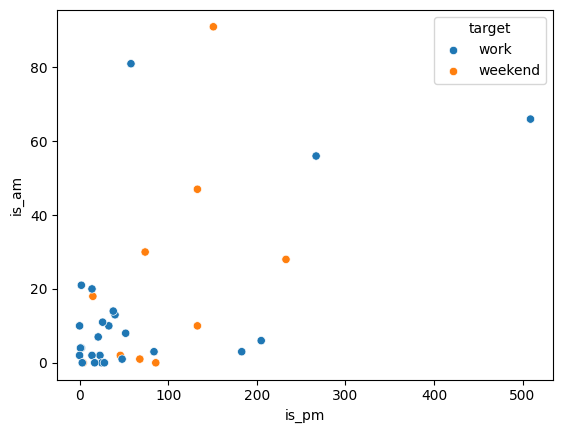

In [14]:
sns.scatterplot(data = df, x = 'is_pm', y = 'is_am', hue = 'target')

* By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

No, it is not easy

## 3. Logistic regression

In [15]:
df['y'] = [1 if item == 'work' else 0 for item in list(df.target)] 

In [16]:
X = np.asarray(df[['is_am','is_pm']])
y = np.asarray(df['y'])
logit_model = sm.Logit(y,X)
logit_model.fit().summary2()

Optimization terminated successfully.
         Current function value: 0.678190
         Iterations 4


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Method:           MLE    
Dependent Variable: y                Pseudo R-squared: -0.134 
Date:               2025-01-17 23:24 AIC:              51.4733
No. Observations:   35               BIC:              54.5840
Df Model:           1                Log-Likelihood:   -23.737
Df Residuals:       33               LL-Null:          -20.939
Converged:          1.0000           LLR p-value:      1.0000 
No. Iterations:     4.0000           Scale:            1.0000 
----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
x1      -0.0004     0.0169   -0.0228   0.9818   -0.0336   0.0328
x2       0.0030     0.0041    0.7239   0.4691   -0.0051   0.0111
==============================================================

"""

In [23]:
logreg = LogisticRegression(fit_intercept=False,random_state=21)
logreg.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [18]:
df['predict'] = logreg.predict(X)

<Axes: xlabel='is_pm', ylabel='is_am'>

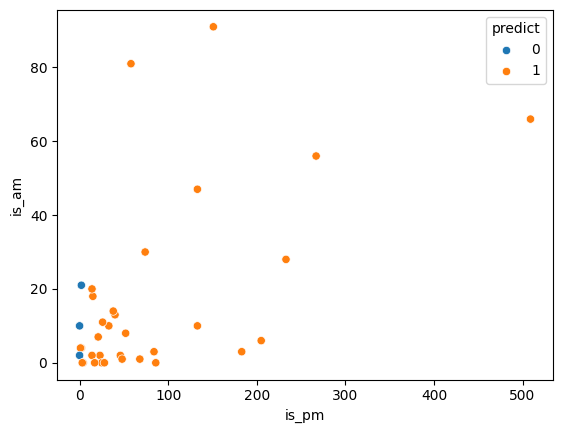

In [19]:
sns.scatterplot(data = df, x = 'is_pm', y = 'is_am', hue = 'predict')

* By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

no, it is no good

In [20]:
df.to_csv('../data/am_pm.csv')

## 4. Evaluation

Calculate accuracy for your predictions.

In [21]:
metrics.accuracy_score(df['y'],df['predict'])

0.6285714285714286

Calculate accuracy for the naive case when each of your prediction is the value of your most popular class of the day.

In [22]:
naive_predictions = []
most_popular = df.y.mode()
for date in df['date'].unique(): 
    naive_predictions.append(df.y.mode())

metrics.accuracy_score(df['y'], naive_predictions)

0.7142857142857143

* Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

no, it is not good